In [1]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [42]:
secret = '10101010101010101'
sec_len = last_qbit = len(secret)
sec_range = range(sec_len)

# Bernstein-Vazirani

In [43]:

c = QuantumCircuit(sec_len+1,sec_len)
c.h(sec_range)

# last bit have an X gate why?
c.x(last_qbit)
c.h(last_qbit)
c.barrier()

# for every bit in secret add a CX (encoding the number)
for idx, bit in enumerate(reversed(secret)):
    if bit == '1':
        c.cx(idx, last_qbit)
c.barrier()

# hadamart again.. why?
c.h(sec_range)
c.barrier()

c.measure(sec_range, sec_range)

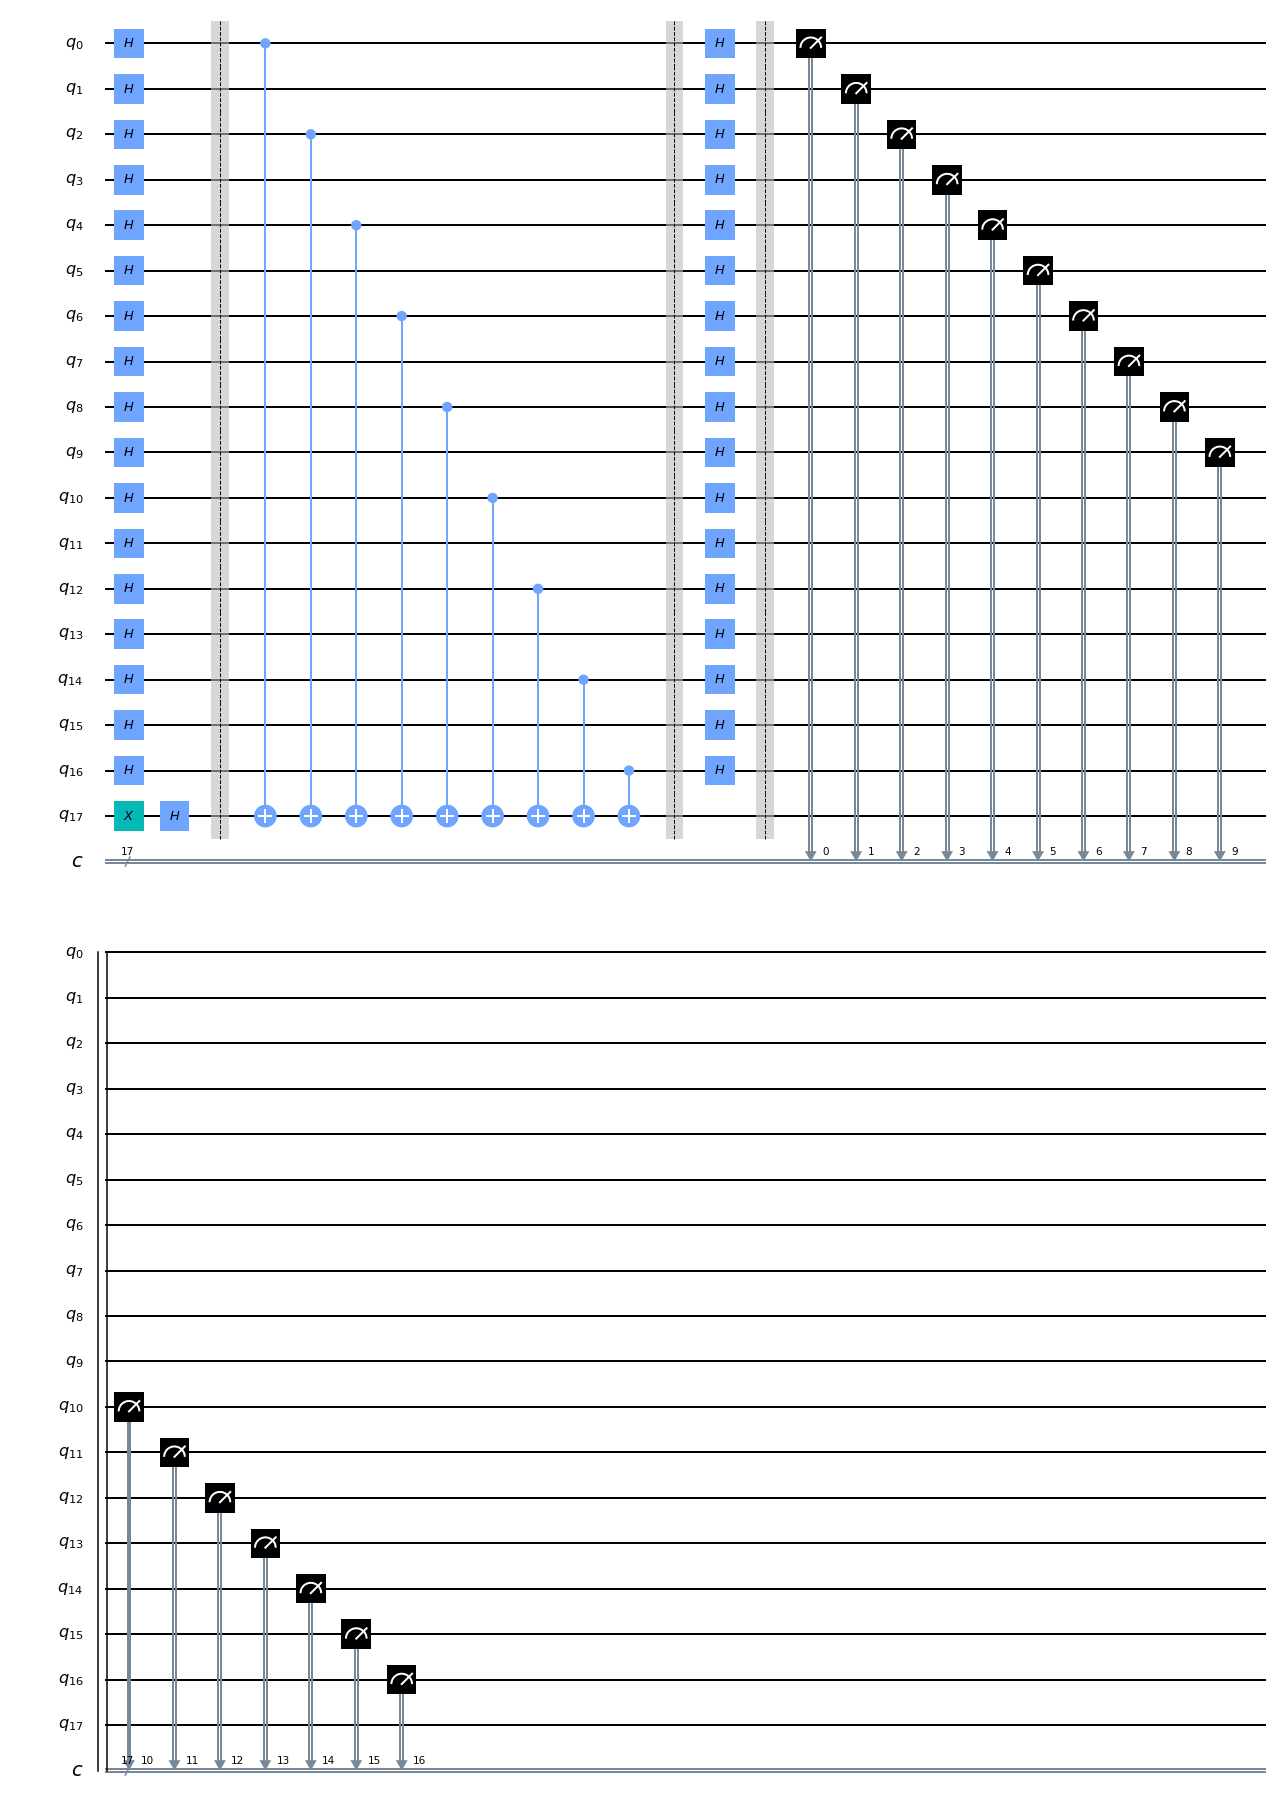

In [44]:
c.draw(output='mpl')

In [40]:
s = Aer.get_backend('qasm_simulator')
r = execute(c, backend=s, shots=1).result()
counts = r.get_counts()
print(counts)
print(counts.get(secret, 'wrong'))

{'111000': 1}
1
